In [212]:
import pandas as pd

In [213]:
df = pd.read_csv('../data/flour_white_month.csv')
df.head()

,date,value
0,1980-01-01,0.203
1,1980-02-01,0.205
2,1980-03-01,0.211
3,1980-04-01,0.206
4,1980-05-01,0.207


In [214]:
df=df.reset_index()['value']
len(df)

514

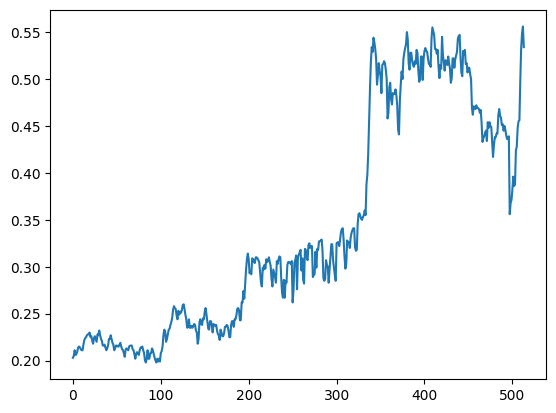

In [215]:
import matplotlib.pyplot as plt
plt.plot(df)


In [216]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))
df1

array([[0.01396648],
       [0.01955307],
       [0.03631285],
       [0.02234637],
       [0.02513966],
       [0.03351955],
       [0.04469274],
       [0.04748603],
       [0.04469274],
       [0.03910615],
       [0.03631285],
       [0.03631285],
       [0.05307263],
       [0.06703911],
       [0.0726257 ],
       [0.07541899],
       [0.08100559],
       [0.08379888],
       [0.08379888],
       [0.08938547],
       [0.07541899],
       [0.07821229],
       [0.06424581],
       [0.05586592],
       [0.0726257 ],
       [0.07821229],
       [0.0698324 ],
       [0.06145251],
       [0.08379888],
       [0.08100559],
       [0.09497207],
       [0.08100559],
       [0.0698324 ],
       [0.06424581],
       [0.05027933],
       [0.05027933],
       [0.05307263],
       [0.04469274],
       [0.03631285],
       [0.04189944],
       [0.05027933],
       [0.0698324 ],
       [0.0698324 ],
       [0.08100559],
       [0.0698324 ],
       [0.05865922],
       [0.05307263],
       [0.036

In [217]:
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

training_size,test_size

(411, 103)

In [218]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [219]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [220]:
print(X_train.shape), print(y_train.shape)

(390, 20)
(390,)


(None, None)

In [221]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [222]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [223]:
model=Sequential()
model.add(LSTM(10,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(10,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [224]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 8s 200ms/step - loss: 0.1015 - val_loss: 0.2020
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0490 - val_loss: 0.0575
Epoch 3/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0248 - val_loss: 0.0124
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0222 - val_loss: 0.0121
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0124 - val_loss: 0.0135
Epoch 6/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0078 - val_loss: 0.0122
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0052 - val_loss: 0.0224
Epoch 8/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0057 - val_loss: 0.0271
Epoch 9/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0055 - val_loss: 0.0168
Epoch 10/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0054 - val_loss: 0.0160
Epoch 11/100
7/7 [

In [225]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [226]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [227]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.19047121424616975

In [228]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.2914027138897573

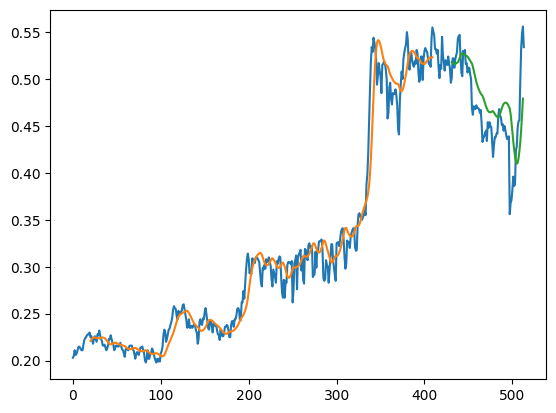

In [230]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

103

In [ ]:
x_input=test_data[83:].reshape(1,-1)
x_input.shape

(1, 20)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<36):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.91514534]
21
1 day input [0.66759777 0.67318436 0.44134078 0.47486034 0.48324022 0.51396648
 0.55307263 0.52513966 0.53072626 0.63128492 0.6424581  0.69832402
 0.71787709 0.72067039 0.83798883 0.93575419 0.98044693 1.
 0.93854749 0.91514534]
1 day output [[0.93364376]]
2 day input [0.67318436 0.44134078 0.47486034 0.48324022 0.51396648 0.55307263
 0.52513966 0.53072626 0.63128492 0.6424581  0.69832402 0.71787709
 0.72067039 0.83798883 0.93575419 0.98044693 1.         0.93854749
 0.91514534 0.93364376]
2 day output [[0.94634956]]
3 day input [0.44134078 0.47486034 0.48324022 0.51396648 0.55307263 0.52513966
 0.53072626 0.63128492 0.6424581  0.69832402 0.71787709 0.72067039
 0.83798883 0.93575419 0.98044693 1.         0.93854749 0.91514534
 0.93364376 0.94634956]
3 day output [[0.9533427]]
4 day input [0.47486034 0.48324022 0.51396648 0.55307263 0.52513966 0.53072626
 0.63128492 0.6424581  0.69832402 0.71787709 0.72067039 0.83798883
 0.93575419 0.98044693 1.         0.93854749 0.91514

In [ ]:
day_new=np.arange(1,21)
day_pred=np.arange(21,57)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

514

In [ ]:
scaler.inverse_transform(lst_output)

array([[0.52562203],
       [0.53224447],
       [0.53679314],
       [0.53929668],
       [0.5378947 ],
       [0.53640894],
       [0.53476236],
       [0.53323389],
       [0.53186217],
       [0.53035351],
       [0.52898075],
       [0.52799858],
       [0.52704957],
       [0.52623545],
       [0.52547202],
       [0.52476066],
       [0.52424137],
       [0.52386876],
       [0.52358237],
       [0.52334507],
       [0.52304917],
       [0.52275045],
       [0.52250653],
       [0.52231141],
       [0.52215711],
       [0.52202731],
       [0.52191872],
       [0.52182767],
       [0.5217517 ],
       [0.52168852],
       [0.52163509],
       [0.52158959],
       [0.5215518 ],
       [0.52151999],
       [0.52149321],
       [0.52147033]])

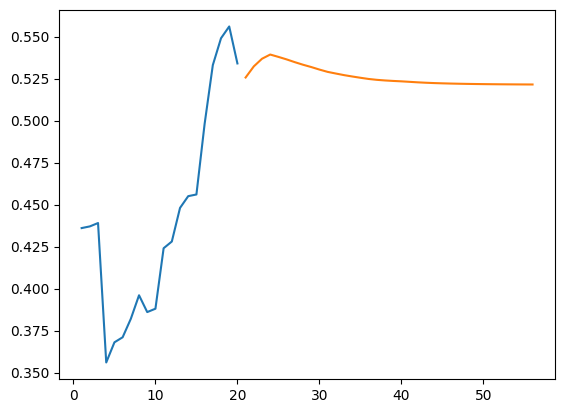

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[494:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

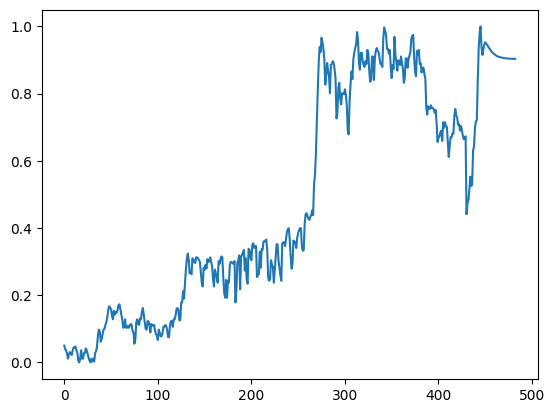

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[67:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

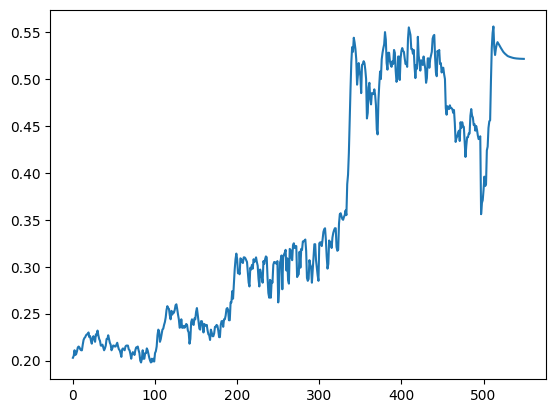

In [ ]:
plt.plot(df3)

In [ ]:
len(df3)

550

In [ ]:
df3

[[0.203],
 [0.205],
 [0.211],
 [0.206],
 [0.20700000000000002],
 [0.21],
 [0.214],
 [0.215],
 [0.214],
 [0.21200000000000002],
 [0.211],
 [0.211],
 [0.21699999999999997],
 [0.22199999999999998],
 [0.224],
 [0.225],
 [0.22699999999999998],
 [0.228],
 [0.228],
 [0.23],
 [0.225],
 [0.22600000000000003],
 [0.221],
 [0.218],
 [0.224],
 [0.22600000000000003],
 [0.223],
 [0.22],
 [0.228],
 [0.22699999999999998],
 [0.23199999999999998],
 [0.22699999999999998],
 [0.223],
 [0.221],
 [0.216],
 [0.216],
 [0.21699999999999997],
 [0.214],
 [0.211],
 [0.213],
 [0.216],
 [0.223],
 [0.223],
 [0.22699999999999998],
 [0.223],
 [0.219],
 [0.21699999999999997],
 [0.211],
 [0.213],
 [0.216],
 [0.216],
 [0.215],
 [0.215],
 [0.21699999999999997],
 [0.219],
 [0.215],
 [0.21200000000000002],
 [0.211],
 [0.208],
 [0.204],
 [0.21200000000000002],
 [0.213],
 [0.21200000000000002],
 [0.211],
 [0.215],
 [0.216],
 [0.216],
 [0.216],
 [0.21200000000000002],
 [0.211],
 [0.20700000000000002],
 [0.202],
 [0.2070000000000

In [ ]:
import pandas as pd
date = pd.date_range('1980-01-01', periods=len(df3), freq='1M')
print(len(df3), len(date))

550 550


In [ ]:
_df3 = df3[264:]
len(_df3)

286

<AxesSubplot: title={'center': 'Three-year white flour price forecast'}, xlabel='Year', ylabel='U.S. Dollar / pound'>

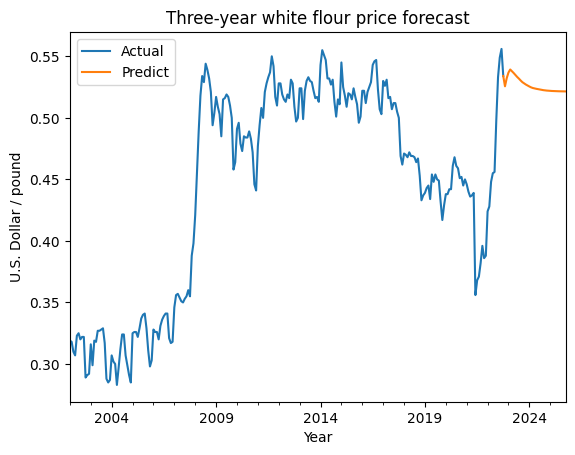

In [ ]:
df_part = pd.DataFrame(
        index=date[264:514],
        columns=['Actual'],
        data=df3[264:514]
    )

df_future = pd.DataFrame(
        index=date[513:],
        columns=['Predict'],
        data=df3[513:]
    )

result = df_part.join(df_future, how='outer')
result.plot(title="Three-year white flour price forecast", xlabel="Year", ylabel="U.S. Dollar / pound")
